In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats.stats import pearsonr 

In [36]:
funda = pd.read_csv("funda-amsterdam.csv", encoding="utf-8")
funda.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


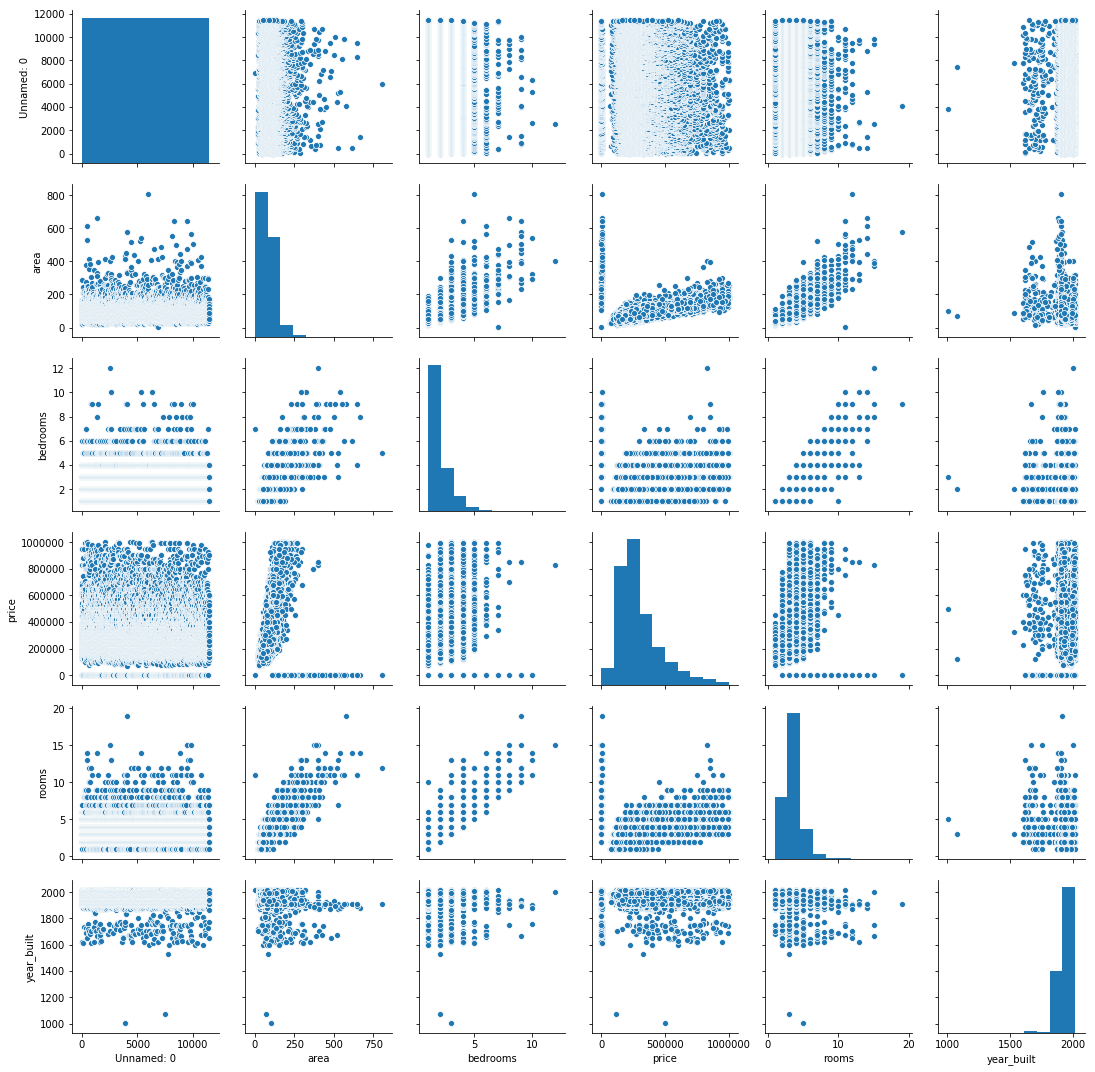

In [25]:
sns.pairplot(funda)
plt.show()

In [26]:
funda.set_index('Unnamed: 0', inplace=True)

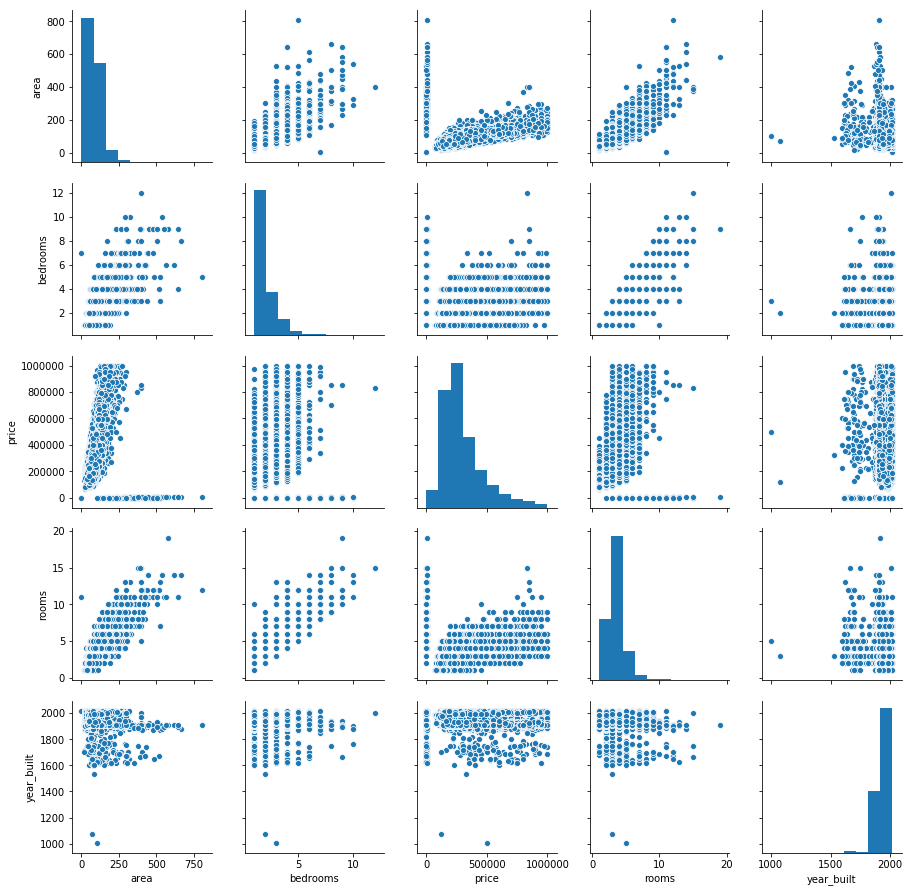

In [27]:
sns.pairplot(funda)
plt.show()

#positive correlations observed: areas and rooms, bedrooms and rooms, area and price

In [29]:
#to check the correlation first create subset with identified data columns
funda_sub = funda[['area',"bedrooms", "rooms", "price"]]
funda_sub.head()

,area,bedrooms,rooms,price
Unnamed: 0,,,,
0,108,2,3,510000
1,47,1,2,215000
2,116,2,3,325000
3,58,2,3,315000
4,63,1,3,200000


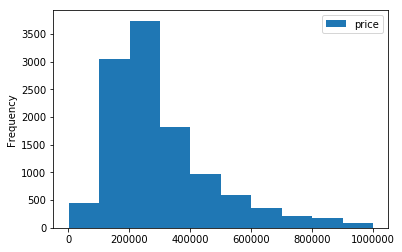

In [30]:
funda_sub.plot(kind='hist', y = "price", bins = 10)

In [31]:
funda_corr = funda_sub[funda_sub["price"] > 100000]

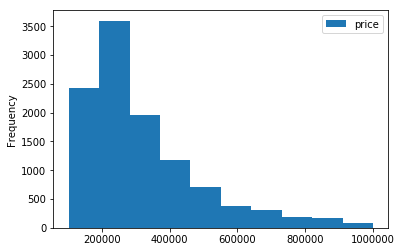

In [32]:
funda_corr.plot(kind='hist', y = "price", bins = 10)

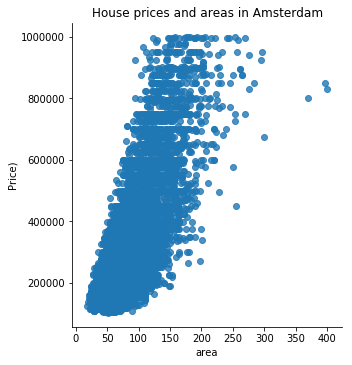

In [34]:
#plot the regression
sns.lmplot(x='area', y='price', fit_reg=False, data=funda_corr) #fit_reg=False leaves out the regression line; see below
plt.xlabel('area') #use matplotlib to refine Seaborn plot
plt.ylabel('Price)')
plt.title('House prices and areas in Amsterdam')
plt.show()

In [39]:
r = pearsonr(funda_corr['area'],funda_corr['price'])
r

(0.7227464256747717, 0.0)

Area and price are strongly positively correlated. r = 0.72
p < 0.001, so this correlation is highly significant